<a href="https://colab.research.google.com/github/ProfessorDong/DSP-Course-Examples/blob/master/z_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(41, 40)


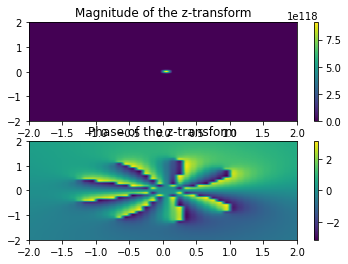

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signal
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Define the range of real and imaginary values
    r = np.arange(-2, 2, 0.1)
    i = np.arange(-20, 21) * 0.1j
    # i = np.linspace(-2j, 2j, num=41)

    # Check if the arrays have any elements
    if r.size == 0 or i.size == 0:
      print("Error: arrays have zero size")
    else:
      # Create a grid of real and imaginary values
      R, I = np.meshgrid(r, i)
      Z = R + I
      print(Z.shape)
      # Loop over all possible values of z in the complex plane
      for z in np.nditer(Z):
          # Calculate the z-transform of x at the current value of z
          Xz = np.sum(x * (z ** (-np.arange(len(x)))))
          # Append the z-transform value to the list
          X.append(Xz)
      X = np.array(X).reshape(Z.shape)
    return np.array(X)

# Calculate the z-transform of the input signal
X = z_transform(x)

# Plot the magnitude and phase of the z-transform
plt.subplot(2, 1, 1)
plt.imshow(np.abs(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of the z-transform')
plt.colorbar()
plt.subplot(2, 1, 2)
plt.imshow(np.angle(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of the z-transform')
plt.colorbar()
plt.show()

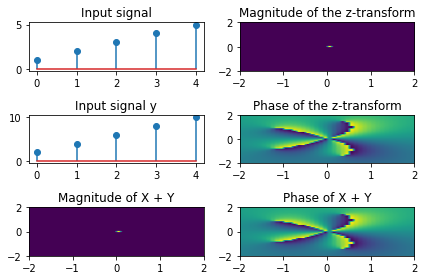

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signal
x = np.array([1, 2, 3, 4, 5])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []

    # Define the range of real and imaginary values
    r = np.arange(-2, 2, 0.1)
    i = np.arange(-20, 21) * 0.1j
    # i = np.linspace(-2j, 2j, num=41)

    # Create a grid of real and imaginary values
    R, I = np.meshgrid(r, i)
    Z = R + I    
    
    # Loop over all possible values of z in the complex plane
    for z in np.nditer(Z):
      # Calculate the z-transform of x at the current value of z
      Xz = np.sum(x * (z ** (-np.arange(len(x)))))
      # Append the z-transform value to the list
      X.append(Xz)
    X = np.array(X).reshape(Z.shape)
    return np.array(X)

# Calculate the z-transform of the input signal
X = z_transform(x)

# Plot the input signal
plt.subplot(3, 2, 1)
plt.stem(x)
plt.title('Input signal')

# Plot the magnitude and phase of the z-transform
plt.subplot(3, 2, 2)
plt.imshow(np.abs(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of the z-transform')
plt.subplot(3, 2, 4)
plt.imshow(np.angle(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of the z-transform')

# Demonstrate linearity of z-transform
y = np.array([2, 4, 6, 8, 10])
Y = z_transform(y)
plt.subplot(3, 2, 3)
plt.stem(y)
plt.title('Input signal y')
plt.subplot(3, 2, 5)
plt.imshow(np.abs(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of X + Y')
plt.subplot(3, 2, 6)
plt.imshow(np.angle(X+Y), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of X + Y')

plt.tight_layout()
plt.show()


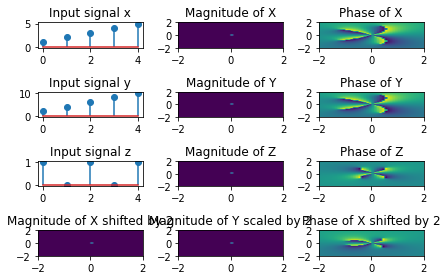

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signals
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
z = np.array([1, 0, 1, 0, 1])

def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Define the range of real and imaginary values
    r = np.arange(-2, 2, 0.1)
    i = np.arange(-20, 21) * 0.1j
    # i = np.linspace(-2j, 2j, num=41)

    # Create a grid of real and imaginary values
    R, I = np.meshgrid(r, i)
    Z = R + I

    # Loop over all possible values of z in the complex plane
    for z in np.nditer(Z):
      # Calculate the z-transform of x at the current value of z
      Xz = np.sum(x * (z ** (-np.arange(len(x)))))
      # Append the z-transform value to the list
      X.append(Xz)
    X = np.array(X).reshape(Z.shape)
    return np.array(X)

# Calculate the z-transform of the input signals
X = z_transform(x)
Y = z_transform(y)
Z = z_transform(z)
X_shifted = z_transform(np.roll(x, 2))  # shift x by 2 positions to the right
Y_scaled = z_transform(2 * y)          # scale y by a factor of 2

# Plot the input signals
plt.subplot(4, 3, 1)
plt.stem(x)
plt.title('Input signal x')
plt.subplot(4, 3, 4)
plt.stem(y)
plt.title('Input signal y')
plt.subplot(4, 3, 7)
plt.stem(z)
plt.title('Input signal z')

# Plot the magnitude and phase of the z-transforms of the input signals
plt.subplot(4, 3, 2)
plt.imshow(np.abs(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of X')
plt.subplot(4, 3, 5)
plt.imshow(np.abs(Y), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of Y')
plt.subplot(4, 3, 8)
plt.imshow(np.abs(Z), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of Z')
plt.subplot(4, 3, 3)
plt.imshow(np.angle(X), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of X')
plt.subplot(4, 3, 6)
plt.imshow(np.angle(Y), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of Y')
plt.subplot(4, 3, 9)
plt.imshow(np.angle(Z), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of Z')

# Plot the magnitude and phase of the z-transforms of the shifted and scaled signals
plt.subplot(4, 3, 10)
plt.imshow(np.abs(X_shifted), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of X shifted by 2')
plt.subplot(4, 3, 11)
plt.imshow(np.abs(Y_scaled), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Magnitude of Y scaled by 2')
plt.subplot(4, 3, 12)
plt.imshow(np.angle(X_shifted), extent=[-2, 2, -2, 2], aspect='auto')
plt.title('Phase of X shifted by 2')

plt.tight_layout()
plt.show()


<ipython-input-44-4d650fdfd6b8>:50: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(len(Y), dtype=np.complex)


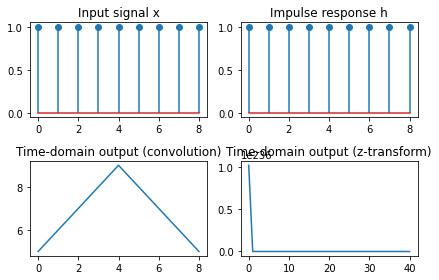

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signals
# x = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
x = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])
h = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# Define the z-transform function
def z_transform(x):
    # Initialize an empty list to store the z-transform values
    X = []
    # Define the range of real and imaginary values
    r = np.arange(-2, 2, 0.1)
    i = np.arange(-20, 21) * 0.1j
    # i = np.linspace(-2j, 2j, num=41)

    # Create a grid of real and imaginary values
    R, I = np.meshgrid(r, i)
    Z = R + I

    # Loop over all possible values of z in the complex plane
    for z in np.nditer(Z):
      # Calculate the z-transform of x at the current value of z
      Xz = np.sum(x * (z ** (-np.arange(len(x)))))
      # Append the z-transform value to the list
      X.append(Xz)
    X = np.array(X).reshape(Z.shape)
    return np.array(X)

def inverse_z_transform(Y):
    """
    Computes the inverse z-transform of Y over a complex plane.

    Args:
    Y: numpy array, representing the z-transform values of a signal over a complex plane.

    Returns:
    x: numpy array, representing the original signal.
    """
    # Define the range of real and imaginary values
    r = np.arange(-2, 2, 0.1)
    i = np.arange(-20, 21) * 0.1j

    # Create a grid of real and imaginary values
    R, I = np.meshgrid(r, i)
    Z = R + I

    # Compute the inverse z-transform of Y at all values of z in the complex plane
    x = np.zeros(len(Y), dtype=np.complex)
    for i in range(len(Y)):
        x[i] = np.sum(Y * (Z ** i))

    return x.real  # return the real part of the inverse z-transform


# Calculate the z-transform of the input signals
X = z_transform(x)
H = z_transform(h)

# Calculate the z-transform of the convolution of x and h
Y = X * H

# Compute the inverse z-transform of Y to obtain the time-domain output signal y
y = inverse_z_transform(Y)

# Compute the convolution of x and h in the time domain
y_conv = np.convolve(x, h, mode='same')

# Plot the input signals and the time-domain and z-domain outputs
plt.subplot(2, 2, 1)
plt.stem(x)
plt.title('Input signal x')
plt.subplot(2, 2, 2)
plt.stem(h)
plt.title('Impulse response h')
plt.subplot(2, 2, 3)
plt.plot(y_conv)
plt.title('Time-domain output (convolution)')
plt.subplot(2, 2, 4)
plt.plot(y)
plt.title('Time-domain output (z-transform)')
plt.tight_layout()
plt.show()


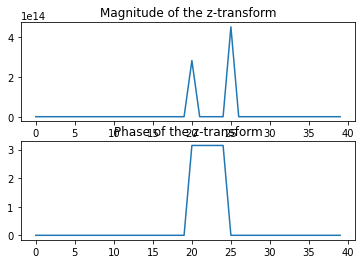

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients of the difference equation
a = np.array([1, -0.5])
b = np.array([1, 0, 0.25])

# Define the z-transform function
def z_transform(b, a):
    # Initialize an empty list to store the z-transform values
    X = []
    # Loop over all possible values of z in the complex plane
    for z in np.arange(-2, 2, 0.1):
        # Calculate the z-transform of the difference equation at the current value of z
        num = np.sum(b * (z ** (-np.arange(len(b)))))
        den = np.sum(a * (z ** (-np.arange(len(a)))))
        Xz = num / den
        # Append the z-transform value to the list
        X.append(Xz)
    return np.array(X)

# Calculate the z-transform of the difference equation
X = z_transform(b, a)

# Plot the magnitude and phase of the z-transform
plt.subplot(2, 1, 1)
plt.plot(np.abs(X))
plt.title('Magnitude of the z-transform')
plt.subplot(2, 1, 2)
plt.plot(np.angle(X))
plt.title('Phase of the z-transform')
plt.show()
